In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import os

import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
## warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


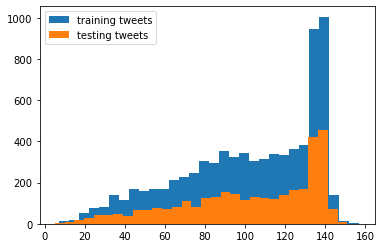

In [4]:
## We can get a quick look as the charater lenght distributins of the tweets in the test and training data sets

train_len=df_train['text'].str.len()
test_len=df_test['text'].str.len()
plt.hist(train_len, bins=30, label="training tweets")
plt.hist(test_len, bins=30, label="testing tweets")
plt.legend()
plt.show()

In [ ]:
import re

def clean_up_tweet(tweet):
    """
    Clean up the content of one tweet, removing punctuation and numbers. 
    
    Parameters:
    tweet(str):The text of the tweet
    
    Returns:
    word_list: A list of pure alphabetic words in lower case
    
    """
    ## Remove all characters execept alphabetic chars and space,
    ## convert to lower case and split on space.
    word_list = re.sub('[^A-Za-z ]+','',tweet).lower().split(' ')
    return word_list